## Problem Statement

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

Facilitate the process of visa approvals.
Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

## Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

case_id: ID of each visa application
continent: Information of continent the employee
education_of_employee: Information of education of the employee
has_job_experience: Does the employee has any job experience? Y= Yes; N = No
requires_job_training: Does the employee require any job training? Y = Yes; N = No
no_of_employees: Number of employees in the employer's company
yr_of_estab: Year in which the employer's company was established
region_of_employment: Information of foreign worker's intended region of employment in the US.
prevailing_wage: Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
case_status: Flag indicating if the Visa was certified or denied

## Importing necessary libraries

In [ ]:
!pip install xgboost


In [ ]:
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

In [ ]:
# df= pd.read_csv("C:\\Users\\moham\\Downloads\\Great Learning\\Ensemble Techniques and Model Tuning\\EasyVisa.csv")

In [ ]:
# Uncomment and run the following code in case Google Colab is being used
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
D= "/content/drive/MyDrive/Python/Ensemble Techniques and Model Tuning/EasyVisa.csv"
df = pd.read_csv(D)




## Looking at the top and bottom five rows

In [ ]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
df.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


## Understanding what type data is our file consisted of

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


## Looking at the statistical description of the data and its shape

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


In [ ]:
df.shape

(25480, 12)

Creating a copy of the dataset to

In [ ]:
Df = df.copy()

Now, let's look for duplicated values.

In [ ]:
Df.duplicated().sum()

np.int64(0)

Now, let's look at missing values.

In [ ]:
Df.isnull().sum()

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


## Exploratory Data Analysis (EDA)

Let's check the statistical summary of the data

In [ ]:
Df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


Now, let's fix the number of negative values in the no_of_employees column.
This line of code helps us to identify the rows with negative value.

In [ ]:
Df.loc[Df["no_of_employees"] < 0].shape

(33, 12)

Let's check the count of each unique category in each of the categorical variables

In [ ]:
# Making a list of all catrgorical variables
cat_col = list(Df.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(Df[column].value_counts())

case_id
EZYV25480    1
EZYV01       1
EZYV02       1
EZYV03       1
EZYV04       1
            ..
EZYV13       1
EZYV12       1
EZYV11       1
EZYV10       1
EZYV09       1
Name: count, Length: 25480, dtype: int64
continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
requires_job_training
N    22525
Y     2955
Name: count, dtype: int64
region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: count, dtype: int64
unit_of_wage
Year     22962
Hour      2157
Week       272
Month       89
Name: count, dtype: int64
full_time_position
Y    22773
N     2707
Name: count, dtype: int64
case_status
Certified    17018
Denied   

Now, let's check the unique ids.

In [ ]:
Df["case_id"].nunique()

25480

It is not important to keep the case id column. It doesn't add any value to our data. So, let's drop it.

In [ ]:
Df.drop(["case_id"], axis=1, inplace=True)

Now, let's begin the univariate analysis.

## Univariate Analysis

Functions required for EDA. Let's define a lableled bar plot and histogram boxplot.

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(Df[feature])  # length of the column
    count = Df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=Df,
        x=feature,
        palette="Paired",
        order=Df[feature].value_counts().index,
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=Df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=Df, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=Df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        Df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        Df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

Now, let's look at the the education of employee.

In [ ]:

labeled_barplot(Df, "education_of_employee", perc=True)

It seems 40% of individuals have a bachelor, while almost 39% of them have a masters. And, only close to 9% of them have a doctorate.

Now, let's look at the data from the region.

In [ ]:

labeled_barplot(Df, "region_of_employment", perc=True)

28% of jobs are in the NE, while 27.5% of them are in the south. And, ~29% of them are in the West. And, only ~17% of them are in the Midwest area.  

Now, let's do the same thing for job experience.  

In [ ]:

labeled_barplot(Df, "has_job_experience", perc=True)

58% of applicants already have job experience, while 42% of them don't.

Now, let's have a look at the number of employees the companies have.

In [ ]:

histogram_boxplot(Df, 'no_of_employees', bins = 20)

There is a lot of outliers in the data. And, the histogram is very much right skewed.

Now, let's have a look at when the companies were established.

In [ ]:
histogram_boxplot(Df, 'yr_of_estab', bins = 20)

It seems a lot of companies were established in the year 2000, while a good number of them were developed in the early 80s and 90s. The numbers drastically go down in the year ~2008. It seems that coincides with the recession.

Now, let's have a look at the full time positions.

In [ ]:
labeled_barplot(Df, "full_time_position", perc=True)

It seems almost 90% of people have full time positions, while close to only 11% of applicants have a part time job.

Now, let's have a look at their case status.

In [ ]:
labeled_barplot(Df, "case_status", perc=True)

It seems close to 67% of people have been certified and 33% have been denied eligibility.

## Now, let's dive into the bivariate analysis.

Let's create a heatmap for numerical columns.

In [ ]:
cols_list = Df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    Df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

This means there is no strong relationship between the compared variables.
It means there is also no linear relationship.

Now, let's create some other functions.

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = Df[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=Df[Df[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=Df[Df[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=Df, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=Df,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

The above function helps to understand how a predictor variable is distributed for each class of the target.



In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = Df[predictor].nunique()
    sorter = Df[target].value_counts().index[-1]
    tab1 = pd.crosstab(Df[predictor], Df[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(Df[predictor], Df[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

This does create a stacked bar plot. It helps to compare variables with each other.

Let's find out if education has any impact on visa certification

In [ ]:
stacked_barplot(Df, "education_of_employee", "case_status")

It seems the higher the degree level, the higher the chance to be certified.

Lets' similarly check for the continents and find out how the visa status vary across different continents.

In [ ]:
stacked_barplot(Df, "continent", "case_status")

Applicants from Europe, Africa and Asia get certified a lot more than the rest of continents.

Let's see if having work experience has any influence over visa certification

In [ ]:
stacked_barplot(Df, "has_job_experience", "case_status")

The chances of those applicants getting denied is quite a bit higher for those with job experience.

Now, let's see if the prevailing wage is similar across all the regions of the US

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=Df, x="region_of_employment", y="prevailing_wage")
plt.show()

The numbers stay the same in the West, NE and Sooth. However, they are slightly higher in MW and Island.
There is also a lot of outliers across all regions.

Let's analyze the data and see if the visa status changes with the prevailing wage.
Prevailing refers to the standard and typical salary people are paid.

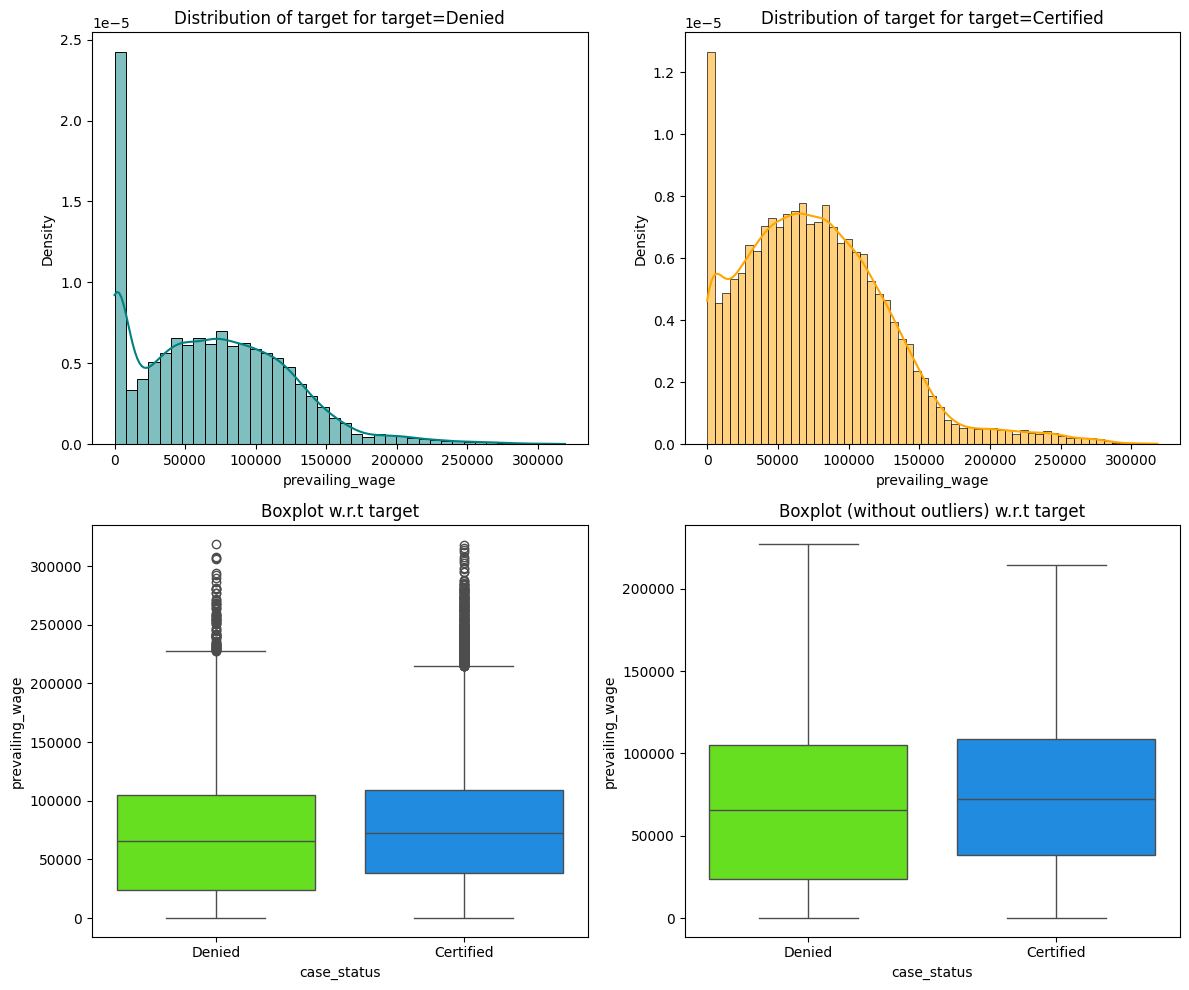

In [ ]:
distribution_plot_wrt_target(Df, "prevailing_wage", "case_status")


The histograms are faily right skewed. The pox plots show there is not a big difference between those who are denied and those who receive certification.

Now, let's see if there is a change between these two variables: yr_of_estab and case_status.

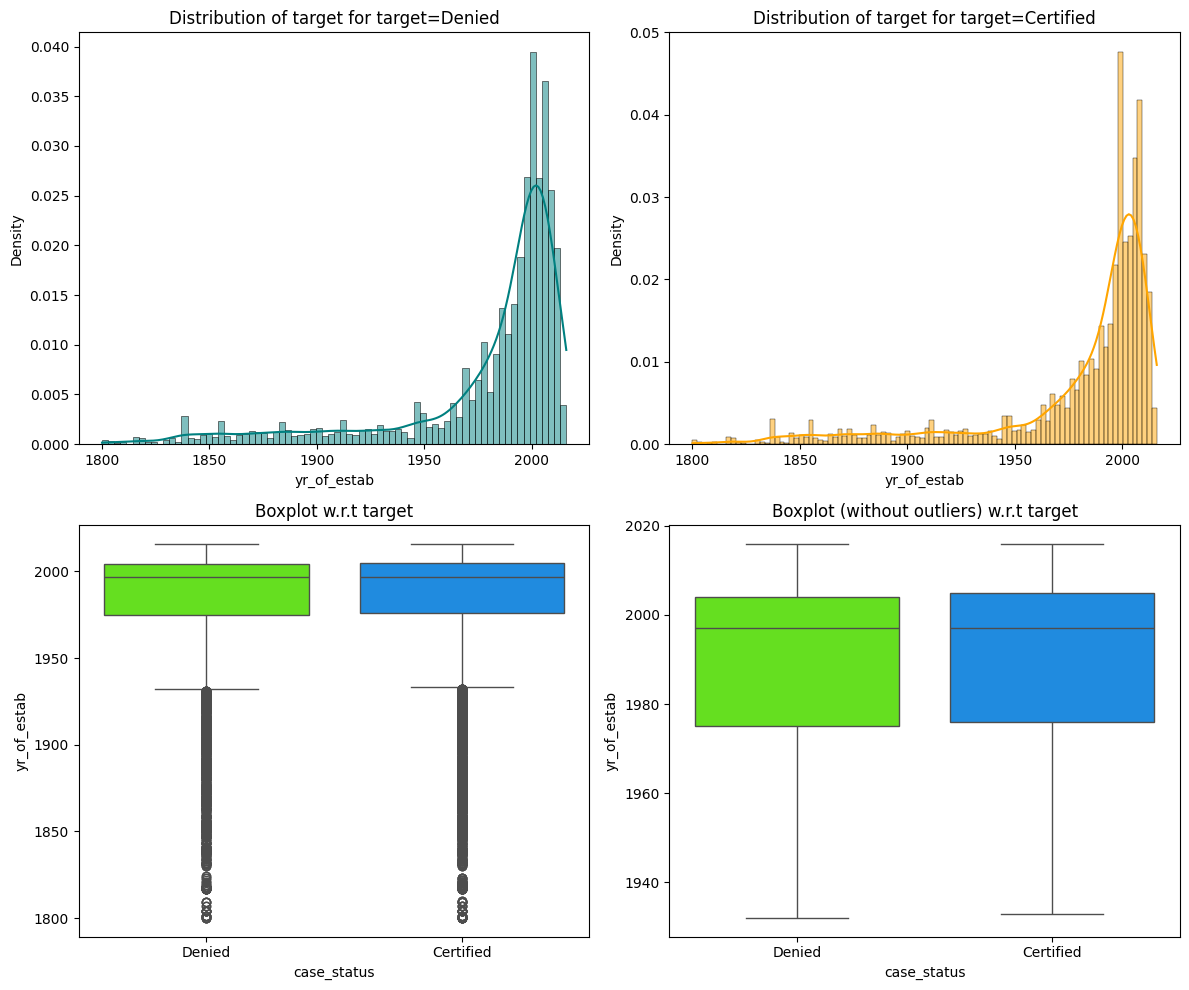

In [ ]:
distribution_plot_wrt_target(Df, "yr_of_estab", "case_status")


The data is very much left skewed and there is a lot of outliers in the boxplots.

Let's find out if the unit of wage has any impact on visa applications getting certified.

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


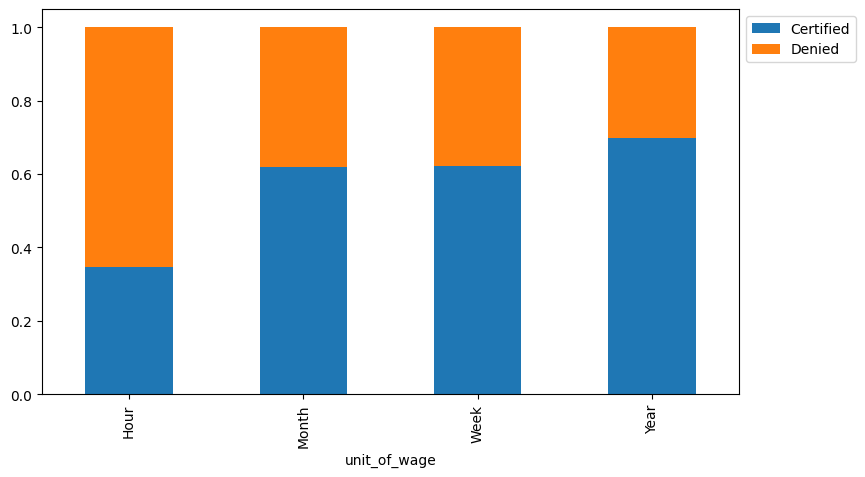

In [ ]:
stacked_barplot(Df, "unit_of_wage", "case_status")

The unit of wage for year receives a lot more certifications than week, month and hour.

Now, let's have a look at the full time positions and their case status.

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


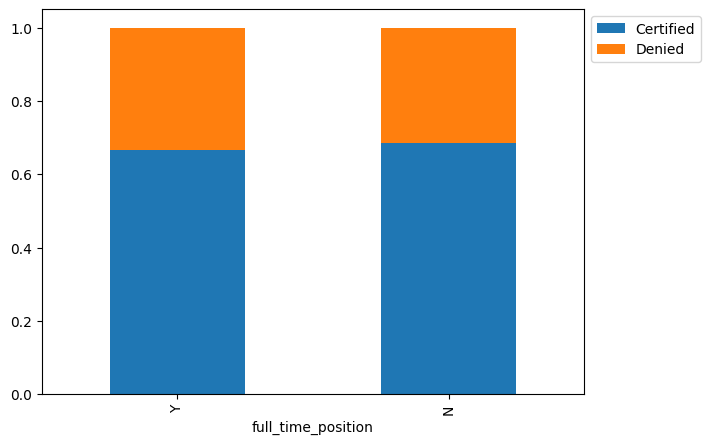

In [ ]:
stacked_barplot(Df, "full_time_position", "case_status")

There is no difference between those who have a full time position or those that don't when it comes to being certified.

Now, let's preprocess the data.

Let's check for outliers in the data.

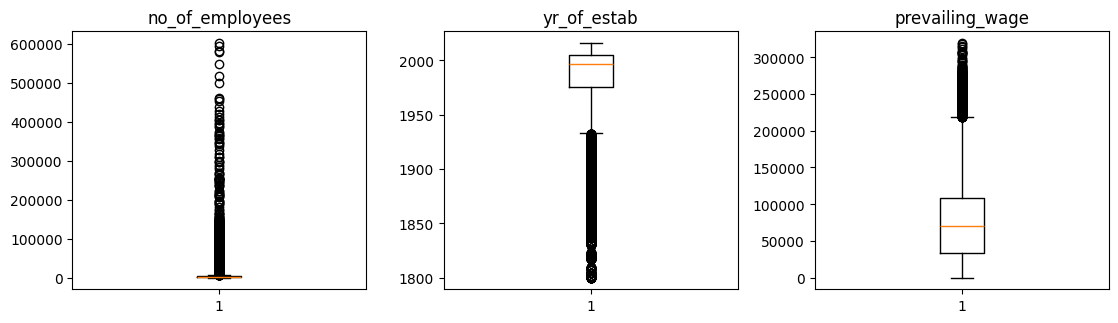

In [ ]:
# outlier detection using boxplot
numeric_columns = Df.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(Df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

There is quite a lot of outliers for all the above variables.

## Data Preparation for modeling

We want to predict which visa will be certified.
Before we proceed to build a model, we'll have to encode categorical features.
We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [ ]:
Df["case_status"] = Df["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

X = Df.drop(["case_status"], axis=1)
y = Df["case_status"]


X = pd.get_dummies(X, drop_first=True)
# X = X.astype(float)

# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of the Validation set: ", X_val.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in validation set:")
print(y_val.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (15288, 21)
Shape of the Validation set:  (5096, 21)
Shape of test set :  (5096, 21)
Percentage of classes in training set:
case_status
1    0.667844
0    0.332156
Name: proportion, dtype: float64
Percentage of classes in validation set:
case_status
1    0.667975
0    0.332025
Name: proportion, dtype: float64
Percentage of classes in test set:
case_status
1    0.667975
0    0.332025
Name: proportion, dtype: float64


## Model Building

Model can make wrong predictions as:

Model predicts that the visa application will get certified but in reality, the visa application should get denied.
Model predicts that the visa application will not get certified but in reality, the visa application should get certified.
Which case is more important?

Both the cases are important as:

If a visa is certified when it had to be denied a wrong employee will get the job position while US citizens will miss the opportunity to work on that position.

If a visa is denied when it had to be certified the U.S. will lose a suitable human resource that can contribute to the economy.

How to reduce the losses?

F1 Score can be used a the metric for evaluation of the model, greater the F1 score higher are the chances of minimizing False Negatives and False Positives.
We will use balanced class weights so that model focuses equally on both classes.

First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.

The model_performance_classification_sklearn function will be used to check the model performance of models.
The confusion_matrix_sklearn function will be used to plot the confusion matrix.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Model Building - Original Data

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random Forest", RandomForestClassifier(random_state=1, class_weight="balanced")))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1, eval_metric='logloss', use_label_encoder=False)))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = f1_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_val = f1_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.989150179193873
Random Forest: 1.0
AdaBoost: 0.8204269947530306
Gradient Boosting: 0.8289261156490839
XGBoost: 0.8955209982307477

Validation Performance:

Bagging: 0.7731761238025056
Random Forest: 0.8044975404075896
AdaBoost: 0.8180081855388813
Gradient Boosting: 0.8263223656809663
XGBoost: 0.8102535525215938


The above outcome means that Baggina and XGBoosting are the best models in the training model. However, Gradiant Boosting seems to be the best option in the validation model.

## Model Building - Oversampled Data

In [ ]:
print("Before Oversampling, counts of label 'Certified': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'Denied': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Certified': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'Denied': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Certified': 10210
Before Oversampling, counts of label 'Denied': 5078 

After Oversampling, counts of label 'Certified': 10210
After Oversampling, counts of label 'Denied': 10210 

After Oversampling, the shape of train_X: (20420, 21)
After Oversampling, the shape of train_y: (20420,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random Forest", RandomForestClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1, eval_metric='logloss', use_label_encoder=False)))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = f1_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = f1_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9873554735547355
Random Forest: 0.9999510308016257
AdaBoost: 0.8005498403689252
Gradient Boosting: 0.8049819427724789
XGBoost: 0.875256386350923

Validation Performance:

Bagging: 0.7654542733123784
Random Forest: 0.7963176064441887
AdaBoost: 0.8195334879279771
Gradient Boosting: 0.8170454545454545
XGBoost: 0.8088214636887203


Random Forest seems to do pretty well in the training section. However, Adaboost is the go-to method in the validation section even though it is only slighly higher than Gradiant Boosting.

Model Building - Undersampled Data

In [ ]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:
print("Before Under Sampling, counts of label 'Certified': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'Denied': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Certified': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'Denied': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random Forest", RandomForestClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1, eval_metric='logloss', use_label_encoder=False)))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = f1_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = f1_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9803687095166915
Random Forest: 1.0
AdaBoost: 0.7015343047380103
Gradient Boosting: 0.7280390842034677
XGBoost: 0.8723508155093271

Validation Performance:

Bagging: 0.7057046979865772
Random Forest: 0.7427184466019418
AdaBoost: 0.765990884802766
Gradient Boosting: 0.7777777777777778
XGBoost: 0.7435039056272915


Bagging seems to be the best option when it comes to undersampling method in the training part. And, Gradiant Boosting is the best choice in the validation part.

Model Performance Improvement

Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase
The models chosen in this notebook are based on test runs. One can update the best models as obtained upon code execution and tune them for best performance.
For Gradient Boosting:

In [103]:
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

For Adaboost:

In [104]:
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

For Bagging Classifier:

In [105]:
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

For Random Forest:

In [106]:
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

For Decision Trees:

In [107]:
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}

For XGBoost:

In [108]:
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}

Hyperparameter Tuning - Random Forest

In [109]:
%%time
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [3, 5, 7],
    "n_estimators": np.arange(10, 40, 10),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=acc_scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

CPU times: user 1.18 s, sys: 106 ms, total: 1.29 s
Wall time: 32.2 s


RandomForestClassifier(max_depth=np.int64(10), min_samples_split=3,
                       n_estimators=np.int64(20), oob_score=True,
                       random_state=1)

Checking model performance on training set

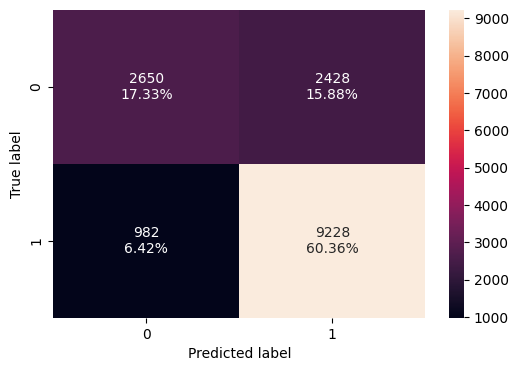

In [110]:
confusion_matrix_sklearn(rf_tuned, X_train, y_train)

This means 60.36% of the data are predicted true and they are actually true. And 17.33% of them are predicted to be true negatives and they are actually true negatives.

In [111]:
rf_tuned_model_train_perf = model_performance_classification_sklearn(
    rf_tuned, X_train, y_train
)
rf_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.776949,0.90382,0.791695,0.84405


Checking model performance on validation set

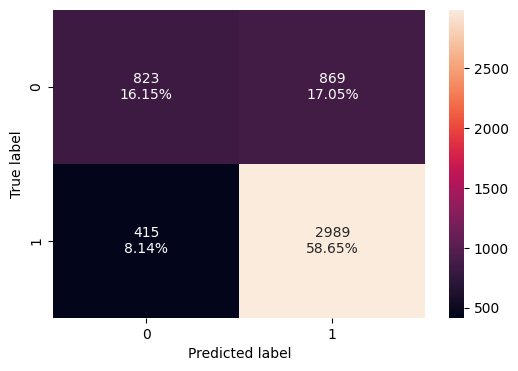

In [112]:
confusion_matrix_sklearn(rf_tuned, X_val, y_val)

58 percent of the data is truly positive, while 16% of the data is truly predicted to be negative.

In [113]:
rf_tuned_model_val_perf = model_performance_classification_sklearn(
    rf_tuned, X_val, y_val
)
rf_tuned_model_val_perf

,Accuracy,Recall,Precision,F1
0,0.748038,0.878085,0.774754,0.823189


In [114]:
# Recall is pretty high which is good, but it is not as high as the recall in the previous method which was .90%.

## Hyperparameter Tuning - AdaBoost Classifier

In [115]:
%%time
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": np.arange(0.01,0.1,0.05),
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(
    estimator=abc_tuned,
    param_grid=parameters,
    scoring=acc_scorer,
    cv=5,              # number of cross-validation folds
    n_jobs=-1,         # use all CPU cores (optional but recommended)
    verbose=1          # shows progress (optional)
)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
CPU times: user 5.73 s, sys: 97.7 ms, total: 5.83 s
Wall time: 1min 7s


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=np.float64(0.060000000000000005),
                   n_estimators=np.int64(100), random_state=1)

Checking model performance on training set

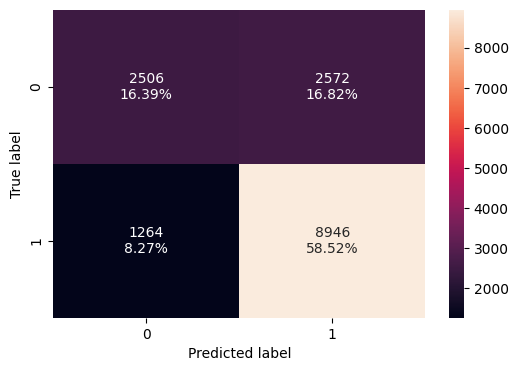

In [116]:
confusion_matrix_sklearn(abc_tuned, X_train, y_train)


In [117]:
# This means ~58.50% of the data are predicted to be true positives while 16.39% of it is truly predicted to be negative.

In [118]:
abc_tuned_model_train_perf = model_performance_classification_sklearn(abc_tuned, X_train, y_train)
abc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.749084,0.8762,0.776697,0.823454


Recall is still pretty high which is good.


## Checking model performance on validation set

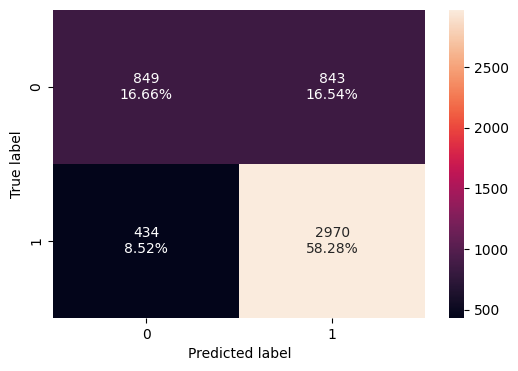

In [119]:
confusion_matrix_sklearn(abc_tuned, X_val, y_val)


In [120]:
# 58.25% of the data is truly positive, while 16.39% of it is truly predicted to be negative.

In [121]:
abc_tuned_model_val_perf = model_performance_classification_sklearn(abc_tuned, X_val, y_val)
abc_tuned_model_val_perf

,Accuracy,Recall,Precision,F1
0,0.749411,0.872503,0.778914,0.823057


In [123]:
# Recall is still pretty high which is a good indication of the model's performance to be generally good.

Hyperparameter Tuning - Gradient Boosting Classifier

In [124]:
%%time
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(50,110,25),
    "subsample": [0.7,0.9],
    "max_features": [0.7, 0.8, 0.9, 1],
    "learning_rate": [0.01,0.1,0.05],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator=gbc_tuned, param_grid=parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

CPU times: user 7min 3s, sys: 595 ms, total: 7min 3s
Wall time: 7min 9s


GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.05, max_features=0.7,
                           n_estimators=np.int64(50), random_state=1,
                           subsample=0.7)

Checking model performance on training set

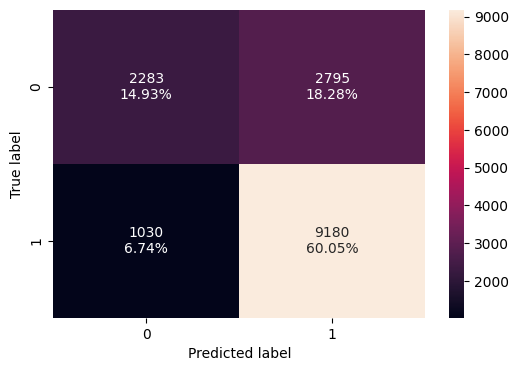

In [125]:
confusion_matrix_sklearn(gbc_tuned, X_train, y_train)


In [127]:
# 60% of the data are predicted true and they are actually true. And 14.93% of them are predicted to be true negatives and they are actually true negatives.

In [128]:
gbc_tuned_model_train_perf = model_performance_classification_sklearn(gbc_tuned, X_train, y_train)
gbc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.749804,0.899119,0.766597,0.827586


In [129]:
# Recall is very high which is good. It means the model would generally perform good.

Checking model performance on validation set

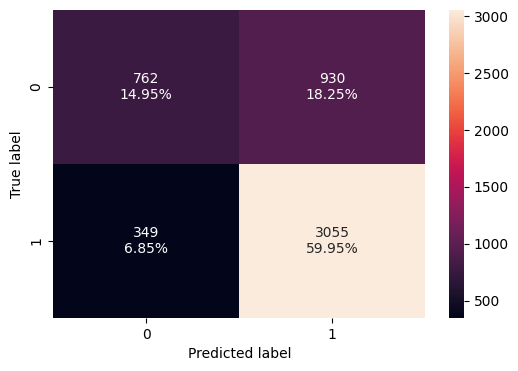

In [130]:
confusion_matrix_sklearn(gbc_tuned, X_val, y_val)


In [131]:
# ~60% of the data is truly positive, while 14.95% of it is truly predicted to be negative.

In [132]:
gbc_tuned_model_val_perf = model_performance_classification_sklearn(gbc_tuned, X_val, y_val)
gbc_tuned_model_val_perf

,Accuracy,Recall,Precision,F1
0,0.749019,0.897474,0.766625,0.826905


In [133]:
# Recall is still very high. And, that is a good indication.

Hyperparameter Tuning - XGBoost Classifier

In [135]:
%%time
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(50,110,25),
    "scale_pos_weight": [1,2,5],
    "subsample": [0.9, 1],
    "learning_rate": [0.01,0.1,0.05],
    "gamma": [1,3]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator=xgb_tuned, param_grid=parameters, scoring=acc_scorer, cv=5)  ## Complete the code to define the grid search object
grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

CPU times: user 3min 15s, sys: 1.52 s, total: 3min 16s
Wall time: 1min 54s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None,
              n_estimators=np.int64(100), n_jobs=None, num_parallel_tree=None,
              random_state=1, ...)

Checking model performance on training set

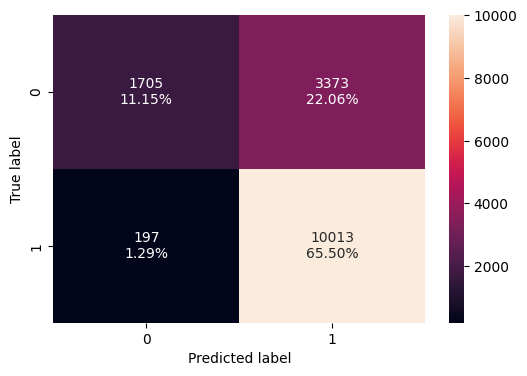

In [136]:
confusion_matrix_sklearn(xgb_tuned, X_train, y_train)


# 65.50% of the data is accurately predicted to be true. And, 11.15% of the data is accurately predicted to be negative. It is a good sign that the model is performing good.

In [138]:
xgb_tuned_model_train_perf = model_performance_classification_sklearn(xgb_tuned, X_train, y_train)
xgb_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.766484,0.980705,0.74802,0.848703


XGB tued model seems to be the best model so far because its recall is the highest one.

Checking model performance on validation set

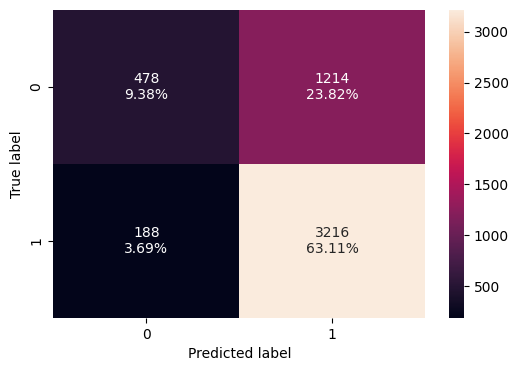

In [139]:
confusion_matrix_sklearn(xgb_tuned, X_val, y_val)


63.11% of the data seems to have been accurately predicted to be true. And, close to 9.5% of the outcome is accurately predicted to be negative.

In [140]:
xgb_tuned_model_val_perf = model_performance_classification_sklearn(xgb_tuned, X_val, y_val)
xgb_tuned_model_val_perf

,Accuracy,Recall,Precision,F1
0,0.724882,0.944771,0.725959,0.821037


xgb_tuned_model_val_perf is still performing pretty darn good with a recall of .94%. Even though it is not as high as the recall in the training portion, it is still very high.


## Model Comparison and Final Model *Selection*

Comparing all models

In [141]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        rf_tuned_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Tuned Random Forest",
    "Tuned Adaboost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier Tuned",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Tuned Random Forest,Tuned Adaboost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier Tuned
Accuracy,0.776949,0.749084,0.749804,0.766484
Recall,0.903820,0.876200,0.899119,0.980705
Precision,0.791695,0.776697,0.766597,0.748020
F1,0.844050,0.823454,0.827586,0.848703


XGBoost Classifier Tuned seems to be the winning option with Recall being the highest.

In [142]:
models_val_comp_df = pd.concat(
    [
        rf_tuned_model_val_perf.T,
        abc_tuned_model_val_perf.T,
        gbc_tuned_model_val_perf.T,
        xgb_tuned_model_val_perf.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Tuned Random Forest",
    "Tuned Adaboost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier Tuned",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,Tuned Random Forest,Tuned Adaboost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier Tuned
Accuracy,0.748038,0.749411,0.749019,0.724882
Recall,0.878085,0.872503,0.897474,0.944771
Precision,0.774754,0.778914,0.766625,0.725959
F1,0.823189,0.823057,0.826905,0.821037


XGBoost Classifier Tuned is still the go-to option becausse it is Regall is still the highest one.

Test Performance:


,Accuracy,Recall,Precision,F1
0,0.713108,0.948296,0.715109,0.815357


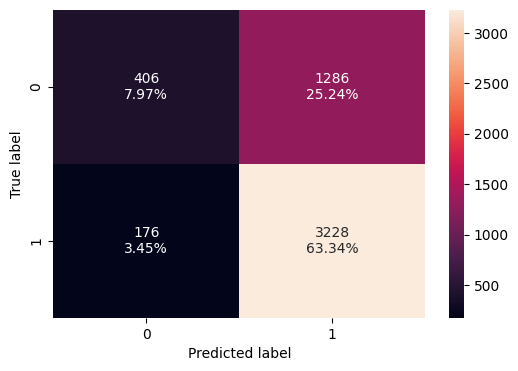

In [143]:
print("Test Performance:")
confusion_matrix_sklearn(xgb_tuned, X_test, y_test)
xgb_tuned_model_test_perf = model_performance_classification_sklearn(
    xgb_tuned, X_test, y_test
)
xgb_tuned_model_test_perf

63.34% of the data seems to have been accurately predicted to be true. And, close to 8% of the data points are accurately predicted to be negative too.


## Important features of the final **model**

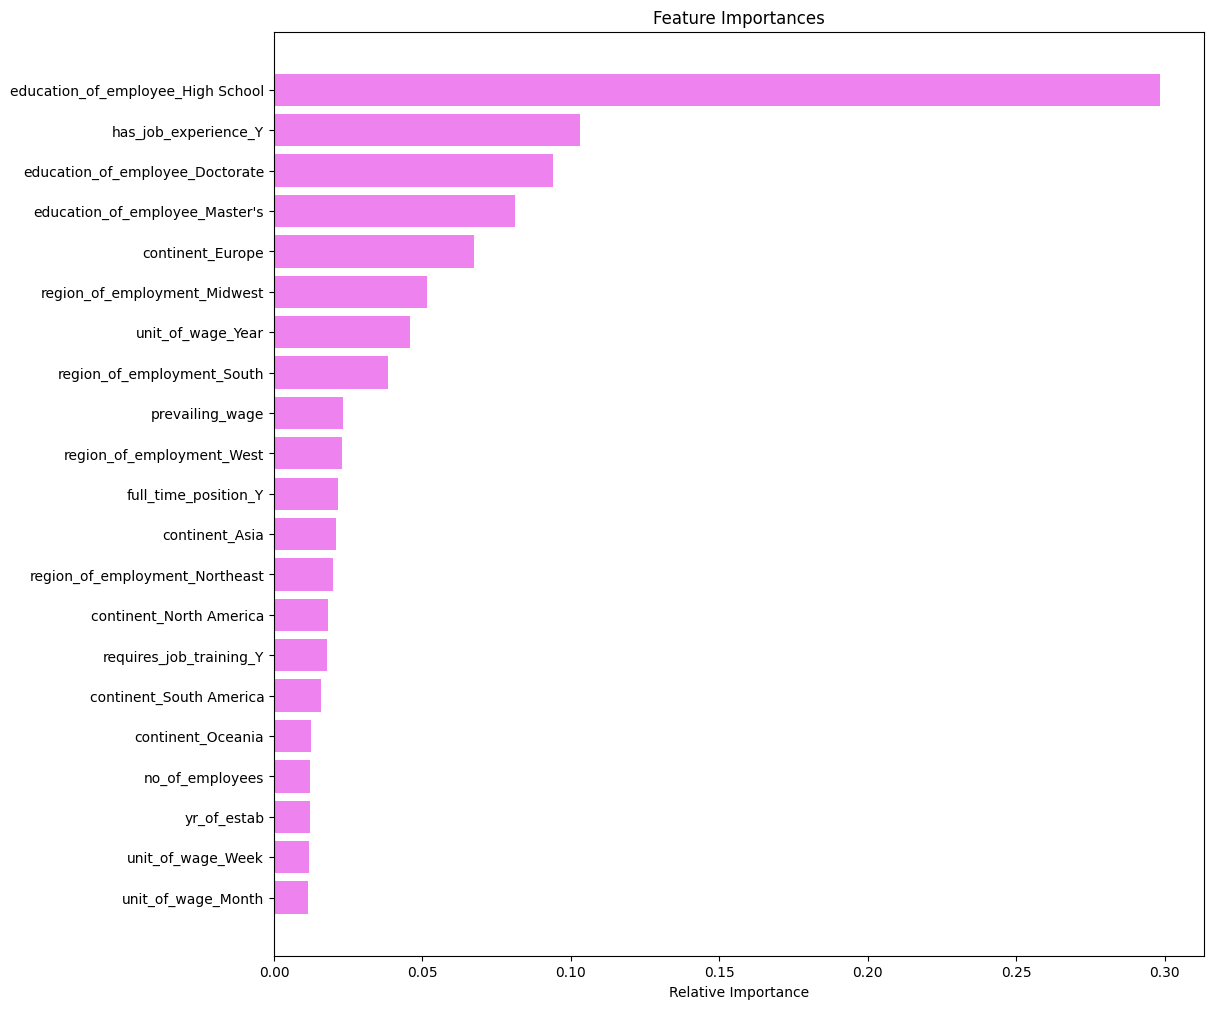

In [144]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

The following options are ranked to be the top 5 important features.

1️⃣ education_of_employee_High School
2️⃣ has_job_experience_Y
3️⃣ education_of_employee_Doctorate
4️⃣ education_of_employee_Master's
5️⃣ continent_Europe

## Actionable Insights and Recommendations

Based on the analysis, here are some recommendations and insights:

Model Selection: The XGBoost Tuned model is a good choice for this problem, primarily because it prioritizes Recall. In the context of visa applications, minimizing False Negatives (denying a visa that should be certified) is crucial to avoid losing suitable candidates. The high Recall indicates the model is effective at identifying most of the potentially certified cases.

Addressing Class Imbalance: The use of SMOTE during the tuning of Random Forest and XGBoost seems to have contributed to improved performance, especially in terms of Recall. This confirms the importance of handling class imbalance in this dataset.

Outlier Treatment: While outliers were identified in numerical features, they were not explicitly handled (e.g., by capping or transformation). For features like no_of_employees and prevailing_wage, outliers might impact the performance of some models. Consider exploring outlier treatment techniques in future iterations.

Feature Engineering:

The yr_of_estab feature could potentially be transformed into a more informative feature, such as the age of the company (current year - yr_of_estab). This might capture the maturity or stability of the employer, which could be relevant to visa certification.
Consider interactions between features. For example, the combination of education level and job experience might have a more significant impact on visa status than each feature alone.

In [ ]:
Df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,0
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,1
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,0
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,0
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,1
